In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [0]:
df = pd.read_csv('Jointed_ficher_v1.csv')

In [0]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,...,City,Hour,Start_Date,Temperature,Dew Point,Relative Humidity,Wind Speed,Precipitation,Precipitation Cover,Visibility
0,2008,1,3,4,1829.0,1755,1959.0,1925,WN,90.0,...,Indianapolis,17,2008-01-03 17:00:00,16.6,8.8,70.99,8.1,0.0,0.0,10.0
1,2008,1,3,4,1749.0,1705,1933.0,1844,EV,104.0,...,Indianapolis,17,2008-01-03 17:00:00,16.6,8.8,70.99,8.1,0.0,0.0,10.0
2,2008,1,3,4,2108.0,1740,2251.0,1930,9E,103.0,...,Indianapolis,17,2008-01-03 17:00:00,16.6,8.8,70.99,8.1,0.0,0.0,10.0
3,2008,1,3,4,1937.0,1830,2037.0,1940,WN,240.0,...,Indianapolis,18,2008-01-03 18:00:00,19.1,10.1,67.40,7.7,0.0,0.0,10.0
4,2008,1,3,4,1845.0,1841,1955.0,1931,NW,130.0,...,Indianapolis,18,2008-01-03 18:00:00,19.1,10.1,67.40,7.7,0.0,0.0,10.0


In [0]:
meteo=df.loc[:,['Temperature','Dew Point','Relative Humidity','Wind Speed','Precipitation','Precipitation Cover','Visibility','WeatherDelay']]
#meteo=meteo[meteo['WeatherDelay'] > 0]

In [0]:
print(df.shape)
print(meteo.shape)
meteo.head()

(1110138, 32)
(1110138, 8)


,Temperature,Dew Point,Relative Humidity,Wind Speed,Precipitation,Precipitation Cover,Visibility,WeatherDelay
0,16.6,8.8,70.99,8.1,0.0,0.0,10.0,0.0
1,16.6,8.8,70.99,8.1,0.0,0.0,10.0,0.0
2,16.6,8.8,70.99,8.1,0.0,0.0,10.0,0.0
3,19.1,10.1,67.40,7.7,0.0,0.0,10.0,0.0
4,19.1,10.1,67.40,7.7,0.0,0.0,10.0,0.0


In [0]:
X=meteo.iloc[:,:-1].values
y=meteo.iloc[:,7].values
X

array([[16.6 ,  8.8 , 70.99, ...,  0.  ,  0.  , 10.  ],
       [16.6 ,  8.8 , 70.99, ...,  0.  ,  0.  , 10.  ],
       [16.6 ,  8.8 , 70.99, ...,  0.  ,  0.  , 10.  ],
       ...,
       [58.1 , 50.1 , 74.76, ...,  0.  ,  0.  , 10.  ],
       [74.  , 70.1 , 87.47, ...,  0.  ,  0.  ,  8.7 ],
       [80.  , 69.8 , 71.1 , ...,  0.  ,  0.  , 10.  ]])

In [0]:
def plot_corr(corr):
    # https://seaborn.pydata.org/examples/many_pairwise_correlations.html
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    sns.heatmap(corr, mask=mask, cmap=cmap)

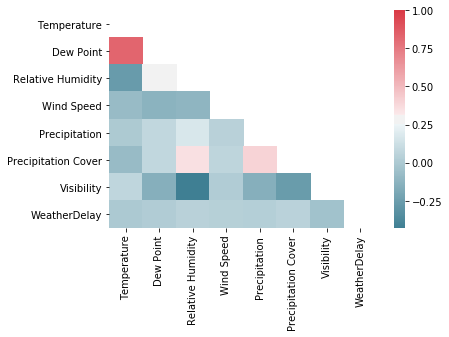

In [0]:
plot_corr(meteo.corr())

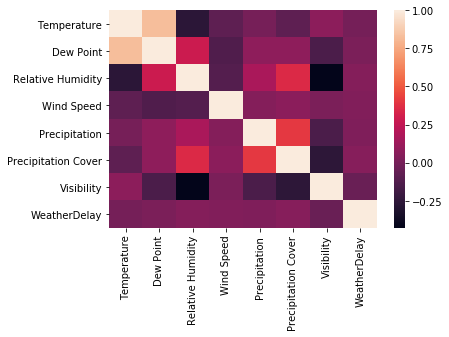

In [0]:
sns.heatmap(meteo.corr())

In [0]:
#X=X[:,[0,2,3,4,5,6]]
#X

In [0]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)

In [0]:
regressor=LinearRegression()
regressor.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred=regressor.predict(Xtest)
print(y_pred)

[4.49699439 3.10419892 3.93046372 ... 0.59722271 2.283144   5.78582586]


In [0]:
regressor.coef_

array([ 0.01588721, -0.00364306,  0.0353948 ,  0.13163913,  3.3579679 ,
        0.01832873, -0.06531884])

In [0]:
regressor.intercept_

-0.7477137330045078

In [0]:
r2_score(ytest,y_pred)

0.005727740463359665